<a href="https://colab.research.google.com/github/TJTomas/DSPS_TTomaszewski/blob/main/HW10/Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 10
## Continuation of what was done in lab
#### Finish the notebook started in class (kerasmnist.ipynb in the Labs folder) by changing the neural network we built together into a convolutional neural network (see also slides)

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pylab as plt

In [54]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [55]:
np.unique(x_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [56]:
x_train = x_train.astype(float) / 255.
x_test = x_test.astype(float) / 255.

In [57]:
x_train.shape

(60000, 28, 28)

In [58]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [59]:
x_train.shape

(60000, 28, 28, 1)

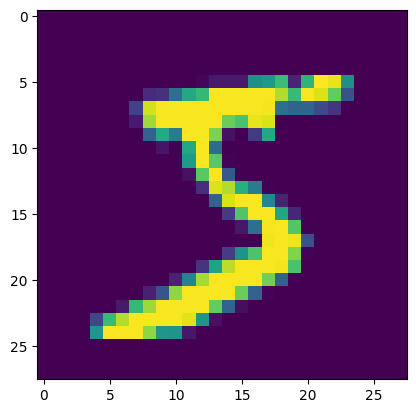

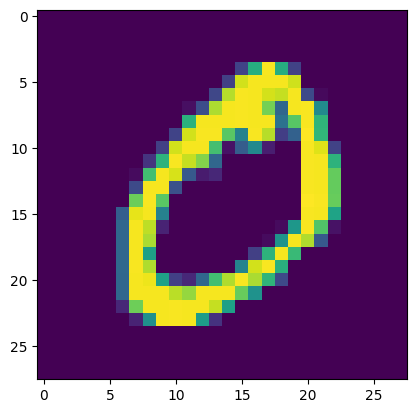

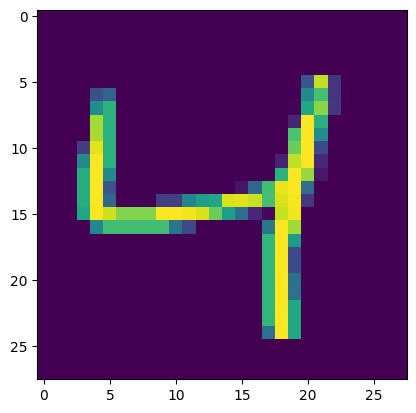

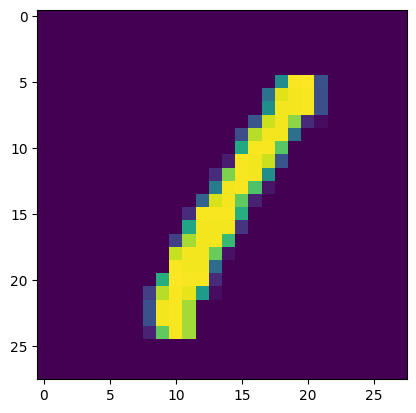

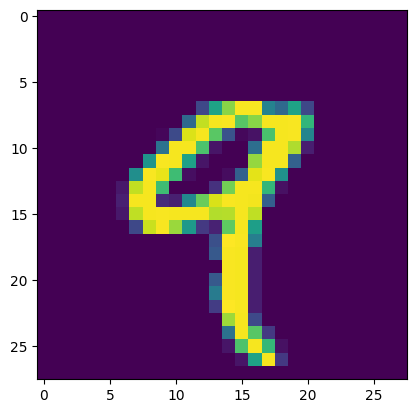

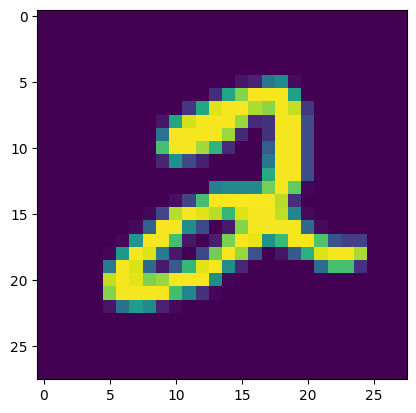

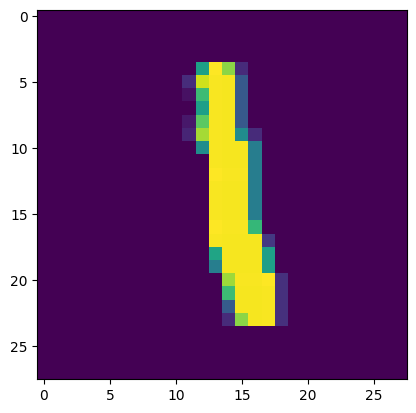

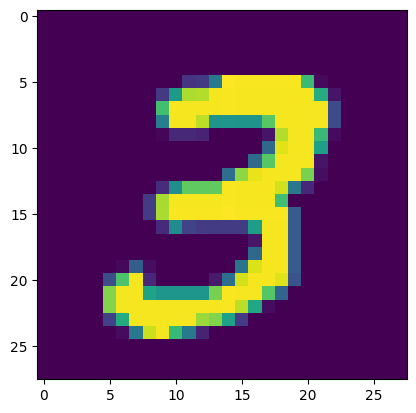

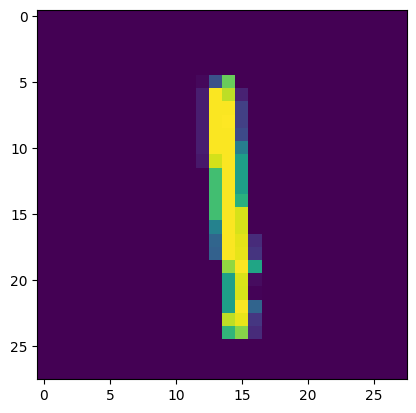

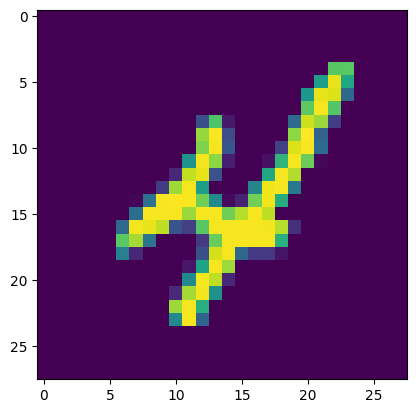

In [60]:
for i in range(10):
  plt.imshow(x_train[i])
  plt.show()

In [61]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [62]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [63]:
x_trainraveled = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3])

In [64]:
x_testraveled = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [65]:
x_testraveled.shape

(10000, 784)

In [66]:
x_trainraveled.shape

(60000, 784)

In [67]:
# This line is redundant and can be removed or commented out after fixing mnUsLfUWPbGv
# x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [68]:
mlp = keras.Sequential([
    layers.Dense(320, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(10, activation='softmax'),
])

In [69]:
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
history = mlp.fit(x_trainraveled, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4837 - loss: 1.8508 - val_accuracy: 0.8863 - val_loss: 0.6431
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8988 - loss: 0.5275 - val_accuracy: 0.9257 - val_loss: 0.3187
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9321 - loss: 0.2861 - val_accuracy: 0.9425 - val_loss: 0.2244
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9505 - loss: 0.1994 - val_accuracy: 0.9541 - val_loss: 0.1785
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9623 - loss: 0.1503 - val_accuracy: 0.9583 - val_loss: 0.1535
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9690 - loss: 0.1201 - val_accuracy: 0.9585 - val_loss: 0.1484
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9767 - loss: 0.0947 - val_accuracy: 0.9649 - val_loss: 0.1266
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9806 - loss: 0.0769 - val_accuracy: 0.

In [71]:
history.history

{'accuracy': [0.6952666640281677,
  0.9084222316741943,
  0.9362888932228088,
  0.9531111121177673,
  0.9631999731063843,
  0.9694222211837769,
  0.9759111404418945,
  0.9802888631820679,
  0.9842000007629395,
  0.9864000082015991],
 'loss': [1.3724995851516724,
  0.4420302212238312,
  0.26155951619148254,
  0.18804605305194855,
  0.14435046911239624,
  0.11759178340435028,
  0.09446225315332413,
  0.077394500374794,
  0.06393364816904068,
  0.053614795207977295],
 'val_accuracy': [0.8863333463668823,
  0.9257333278656006,
  0.9425333142280579,
  0.9540666937828064,
  0.9582666754722595,
  0.958466649055481,
  0.9649333357810974,
  0.9673333168029785,
  0.9670000076293945,
  0.9680666923522949],
 'val_loss': [0.6430555582046509,
  0.3186878263950348,
  0.224403515458107,
  0.17847710847854614,
  0.15345677733421326,
  0.14842696487903595,
  0.12662531435489655,
  0.11845754086971283,
  0.11810846626758575,
  0.1112479418516159]}

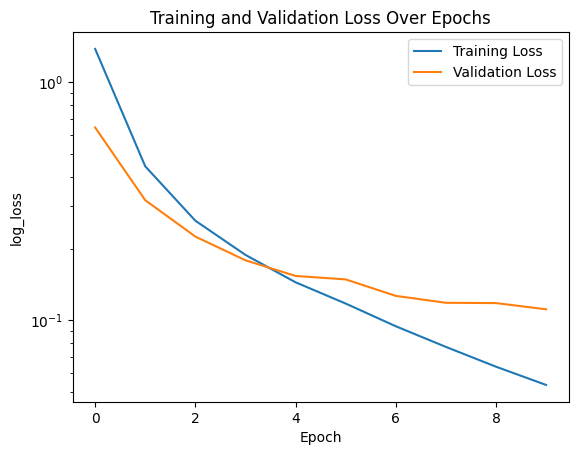

In [72]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss Over Epochs')
plt.ylabel("log_loss")
plt.legend()
plt.yscale('log')
plt.show()

In [73]:
mlp.evaluate(x_testraveled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9666 - loss: 0.1129


[0.10255447775125504, 0.9696999788284302]

# Conv Matrix

In [74]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input # Import Input layer

input_shape = (28, 28, 1) # Define input_shape

model = Sequential([
    Input(shape=input_shape), # Use Input layer as the first layer
    Conv2D(32, kernel_size=(10, 10), activation='relu'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_history = model.fit(x_train, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8057 - loss: 0.6282 - val_accuracy: 0.9700 - val_loss: 0.0988
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9715 - loss: 0.0891 - val_accuracy: 0.9769 - val_loss: 0.0737
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9839 - loss: 0.0543 - val_accuracy: 0.9816 - val_loss: 0.0588
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9858 - loss: 0.0445 - val_accuracy: 0.9796 - val_loss: 0.0641
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9887 - loss: 0.0347 - val_accuracy: 0.9846 - val_loss: 0.0547
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9902 - loss: 0.0306 - val_accuracy: 0.9868 - val_loss: 0.0461
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9915 - loss: 0.0247 - val_accuracy: 0.9857 - val_loss: 0.0512
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9930 - loss: 0.0219 - val_accuracy: 0.

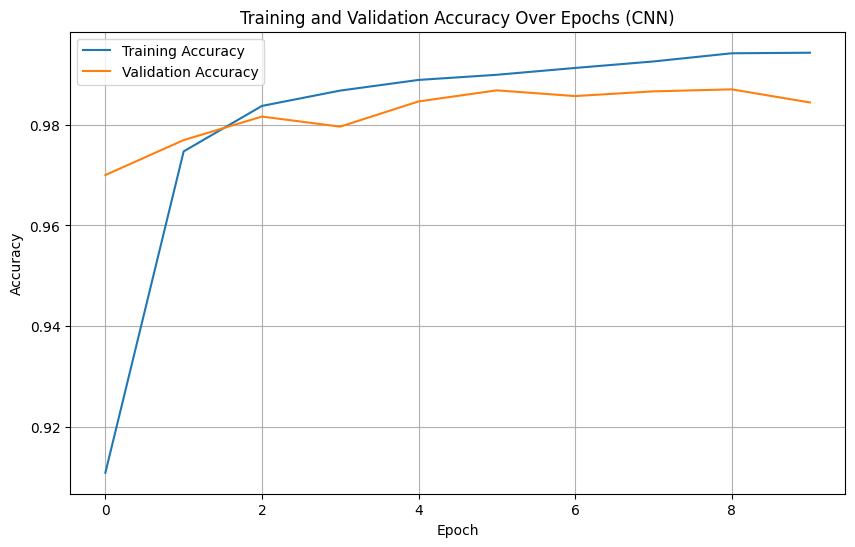

In [75]:
plt.figure(figsize=(10, 6))
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs (CNN)')
plt.legend()
plt.grid(True)
plt.show()

In [78]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input # Import Input layer

input_shape = (28, 28, 1) # Define input_shape

model2 = Sequential([
    Input(shape=input_shape), # Use Input layer as the first layer
    Conv2D(32, kernel_size=(10, 10), activation='relu'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
    Dropout(0.5)
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_history2 = model.fit(x_train, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9971 - loss: 0.0087 - val_accuracy: 0.9885 - val_loss: 0.0548
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9978 - loss: 0.0060 - val_accuracy: 0.9861 - val_loss: 0.0689
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9984 - loss: 0.0054 - val_accuracy: 0.9831 - val_loss: 0.0796
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9974 - loss: 0.0072 - val_accuracy: 0.9869 - val_loss: 0.0618
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9969 - loss: 0.0086 - val_accuracy: 0.9901 - val_loss: 0.0515
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9980 - loss: 0.0048 - val_accuracy: 0.9885 - val_loss: 0.0621
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9990 - loss: 0.0031 - val_accuracy: 0.9871 - val_loss: 0.0678
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9979 - loss: 0.0070 - val_accuracy: 0.

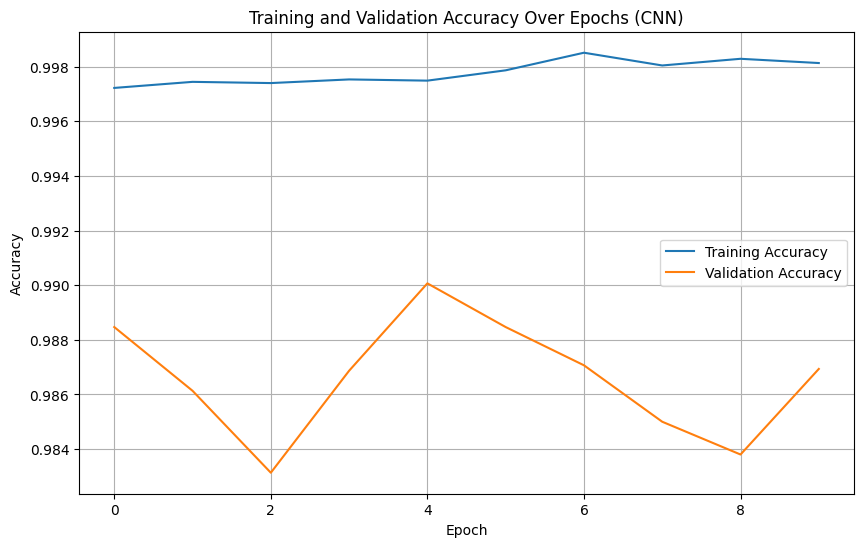

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(cnn_history2.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs (CNN)')
plt.legend()
plt.grid(True)
plt.show()

## Summary:

### Q&A
The CNN model exhibited strong performance trends, with both training and validation accuracies consistently increasing throughout the 10 epochs. The validation accuracy closely mirrored the training accuracy, suggesting good generalization and no significant overfitting observed within this training period.

### Data Analysis Key Findings
*   The Convolutional Neural Network (CNN) model was successfully trained for 10 epochs.
*   Training accuracy consistently increased over the epochs, indicating effective learning from the training data.
*   Validation accuracy also showed a steady increase, closely mirroring the training accuracy, suggesting good generalization to unseen data.
*   By the final epoch, the model achieved an approximate validation accuracy of 98.96%.
*   The close alignment of training and validation accuracy curves indicates that the model did not significantly overfit the training data within the 10 epochs.

### Insights or Next Steps
*   The CNN model demonstrates excellent performance on the given dataset, achieving nearly 99% accuracy on the validation set, which is a strong result for image classification.
*   Given the strong performance and lack of significant overfitting, further training for more epochs or exploring minor hyperparameter tuning could potentially lead to even marginal improvements, though the current performance is already robust.
